In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.style.use(style='ggplot')


df = pd.read_csv('train.csv')
df = df.drop(columns=['Id','LandContour','YrSold'])


In [4]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     Utilities LotConfig LandSlope  ... ScreenPorch PoolArea PoolQC  Fence  \
0       AllPub    Inside       Gtl  ...           0        0    NaN    NaN   
1       AllPub       FR2       Gtl  ...           0        0    NaN    NaN   
2       AllPub    Inside       Gtl  ...           0        0    NaN    NaN   
3       AllPub    Corner       Gtl  ...           0        0    NaN    NaN   
4       AllPub       FR2       Gtl  ...           0        0    NaN    NaN   
...        ...       ...       ...  ...         ...      ...    ...    ...   
1455    AllPub    Inside       Gtl  ...           0        0    NaN    NaN   
1456    AllPub    Inside       Gtl  ...           0        0    NaN  MnPrv   
1457    AllPub    Inside       Gtl  ...           0        0    NaN  GdPrv   
1458    AllPub    Inside       Gtl  ...           0        0    NaN    NaN   
1459    AllPub    Inside       Gtl  ...           0        0    NaN    NaN   

     MiscFeature  MiscVal  MoSold  SaleType  SaleCondition SalePrice  
0            NaN        0       2        WD         Normal    208500  
1            NaN        0       5        WD         Normal    181500  
2            NaN        0       9        WD         Normal    223500  
3            NaN        0       2        WD        Abnorml    140000  
4            NaN        0      12        WD         Normal    250000  
...          ...      ...     ...       ...            ...       ...  
1455         NaN        0       8        WD         Normal    175000  
1456         NaN        0       2        WD         Normal    210000  
1457        Shed     2500       5        WD         Normal    266500  
1458         NaN        0       4        WD         Normal    142125  
1459         NaN        0       6        WD         Normal    147500  

[1460 rows x 78 columns]

In [5]:
x = df.isna().sum()
x = pd.DataFrame(x).reset_index()
x = x[x[0] != 0]

def nullperc(x):
    plist = []
    for i in range(len(x)):
        prs = (x.iloc[i,1]/1458)*100
        plist.append(prs)
    x['null_percentage'] = plist
    return x

nullperc(x)

index     0  null_percentage
2    LotFrontage   259        17.764060
5          Alley  1369        93.895748
23    MasVnrType     8         0.548697
24    MasVnrArea     8         0.548697
28      BsmtQual    37         2.537723
29      BsmtCond    37         2.537723
30  BsmtExposure    38         2.606310
31  BsmtFinType1    37         2.537723
33  BsmtFinType2    38         2.606310
40    Electrical     1         0.068587
55   FireplaceQu   690        47.325103
56    GarageType    81         5.555556
57   GarageYrBlt    81         5.555556
58  GarageFinish    81         5.555556
61    GarageQual    81         5.555556
62    GarageCond    81         5.555556
70        PoolQC  1453        99.657064
71         Fence  1179        80.864198
72   MiscFeature  1406        96.433471

In [6]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MiscVal            21
MoSold             12
SaleType            9
SaleCondition       6
SalePrice         663
Length: 78, dtype: int64

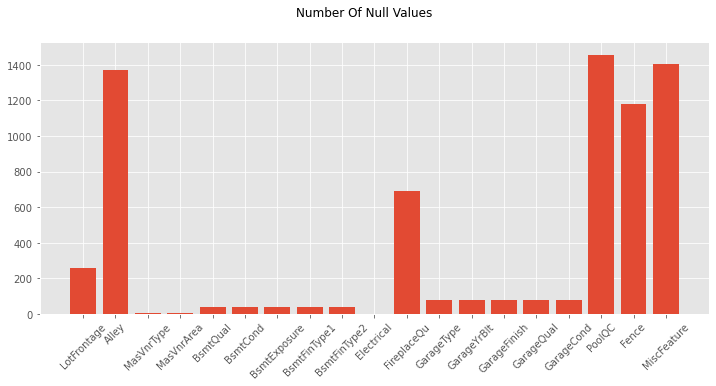

In [7]:

fig = plt.figure(figsize=(12, 5))
ax = plt.bar(x['index'],x[0])
ticks = plt.xticks(rotation = 45)
title = fig.suptitle("Number Of Null Values")


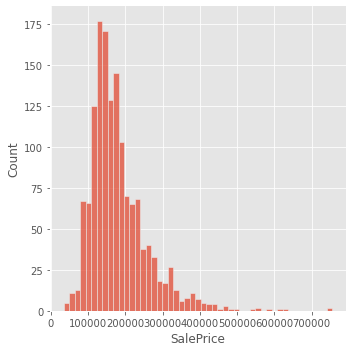

In [8]:
sns.displot(df['SalePrice'])

C:\Users\I7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

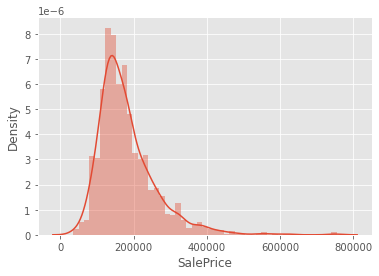

In [9]:
sns.distplot(df['SalePrice'])

C:\Users\I7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

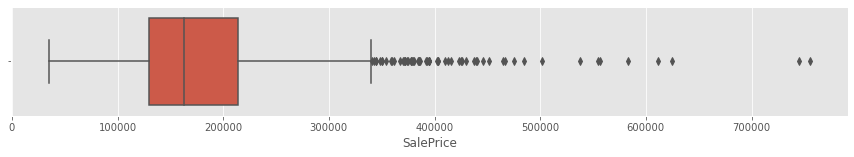

In [10]:
plt.figure(figsize=(15, 2))
sns.boxplot(df['SalePrice'])

In [11]:
obj = df.select_dtypes(include='object')
for i in obj.columns:
    le1 = LabelEncoder()
    df[i] = le1.fit_transform(df[i])
    #df[i] = np.deepcopy(df[i])

In [12]:
df = df.drop(columns = df.loc[:,list((100*(df.isnull().sum()/len(df))>=60))].columns)
df = df.dropna()
df = df[(np.abs(stats.zscore(df['SalePrice'])) < 3)]


C:\Users\I7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\I7\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

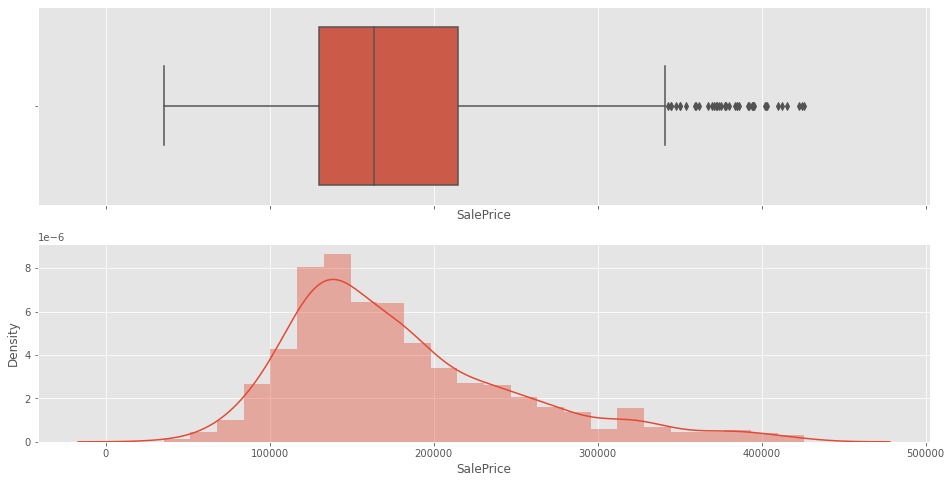

In [13]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,8))

sns.boxplot(df.iloc[:,-1],ax=axes[0])
sns.distplot(df.iloc[:,-1],ax=axes[1])


In [14]:
from sklearn import preprocessing,neighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [15]:
Y = df['SalePrice']
X = df.drop(columns ='SalePrice')


In [16]:
def print_errors(true,predicted):
    MAE =  metrics.mean_absolute_error(true,predicted)
    MSE = metrics.mean_squared_error(true,predicted)
    RMSE  = np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_score = metrics.r2_score(true,predicted)
    print(f'MAE : {MAE}')
    print(f'MSE : {MSE}')
    print(f'RMSE : {RMSE}')
    print(f'r2_score : {r2_score}')
    
    
def evalute_errors(true,predicted):
    MAE =  metrics.mean_absolute_error(true,predicted)
    MSE = metrics.mean_squared_error(true,predicted)
    RMSE  = np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_score = metrics.r2_score(true,predicted)
    return MAE,MSE,RMSE,r2_score


In [17]:
reg = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3)

reg.fit(x_train,y_train) 
reg_score = reg.score(x_train,y_train)

In [18]:
test_predicted = reg.predict(x_test)
train_predicted = reg.predict(x_train)



reg_error=evalute_errors(y_test,test_predicted)
print_errors(y_test,test_predicted)

print(f'score : {reg.score(x_train,y_train)}')

MAE : 25086.699291397174
MSE : 11102132062.00846
RMSE : 105366.65536121216
r2_score : -1.3403507339784975
score : 0.8771744976574447


C:\Users\I7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

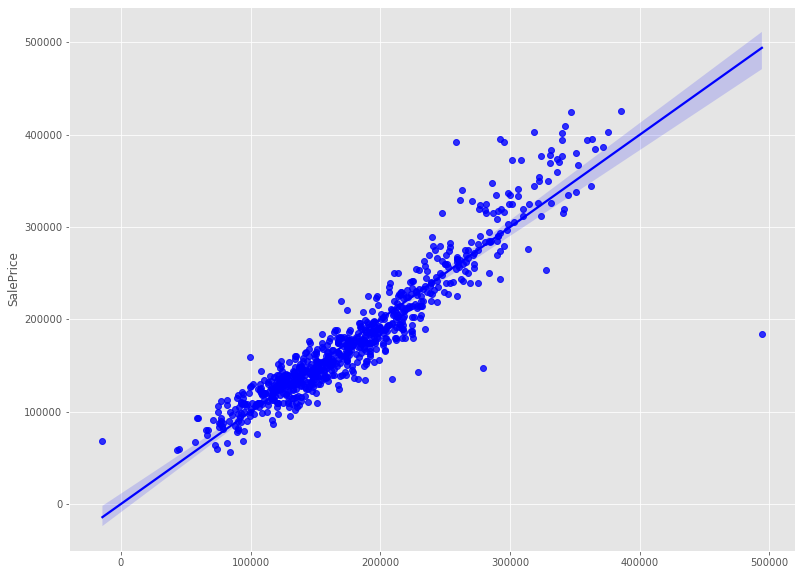

In [19]:
#x_train = x_train.reshape([1,-1])
plt.figure(figsize=(13, 10))

sns.regplot(train_predicted,y_train,color='blue')


In [20]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)
test_predicted = clf.predict(x_test)
train_predicted = clf.predict(x_train)
clf_score = clf.score(x_train,y_train)


clf_error=evalute_errors(y_test,test_predicted)
print_errors(y_test,test_predicted)
print(f'score : {clf.score(x_train,y_train)}')

MAE : 46257.25903614458
MSE : 4135191038.4879518
RMSE : 64305.45107911111
r2_score : 0.12829379726223544
score : 0.1888745148771022


C:\Users\I7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

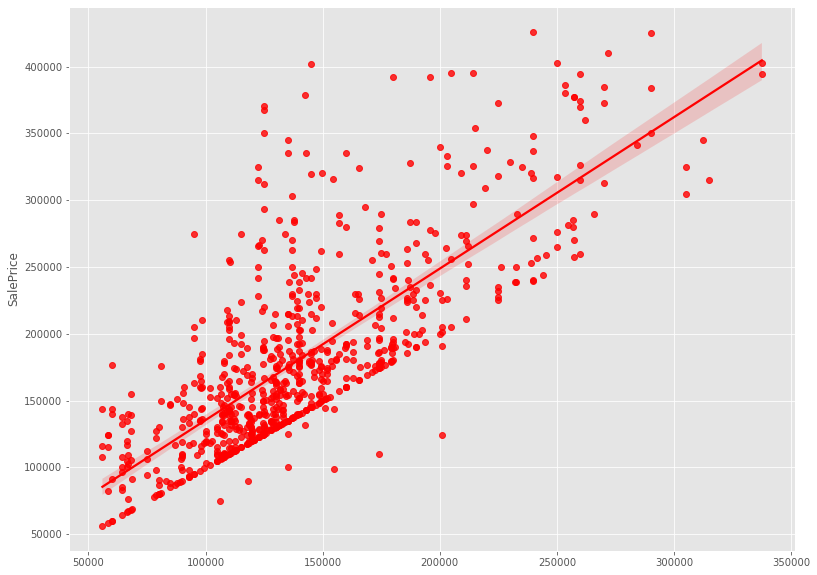

In [21]:

plt.figure(figsize=(13, 10))

sns.regplot(train_predicted,y_train,color='red')


In [22]:
from xgboost import XGBRegressor


regr = XGBRegressor()
regr.fit(x_train, y_train)
regr_score = regr.score(x_train,y_train)




test_predicted = regr.predict(x_test)
train_predicted = regr.predict(x_train)

regr_error=evalute_errors(y_test,test_predicted)
print_errors(y_test,test_predicted)

print(f'score : {regr.score(x_train,y_train)}')

MAE : 17687.67712255271
MSE : 676297306.917873
RMSE : 26005.716812229442
r2_score : 0.8574352304771099
score : 0.9999691111500494


C:\Users\I7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='SalePrice'>

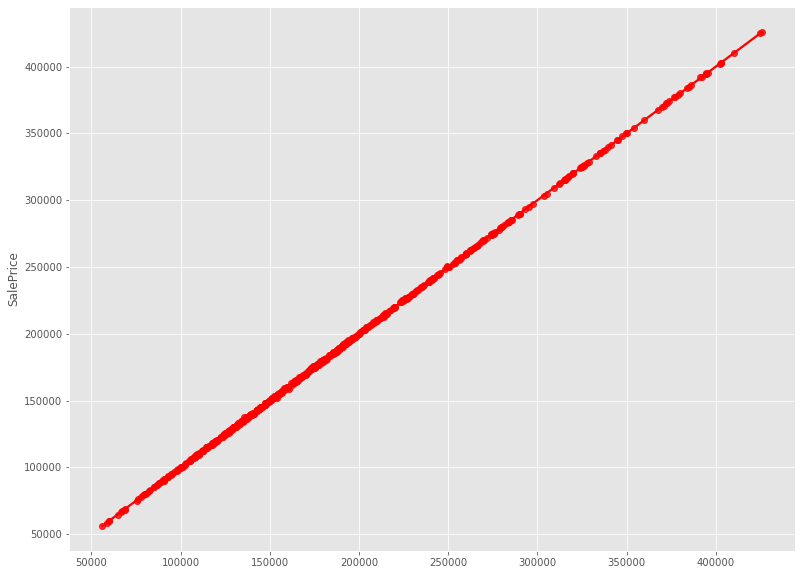

In [23]:
plt.figure(figsize=(13, 10))

sns.regplot(train_predicted,y_train,color='red')

In [24]:
errors = pd.DataFrame()
reg_error = list(reg_error)
errors[['MAE ','MSE','RMSE','r2_score']] =''
errors.loc[0] = reg_error
errors.loc[1] = list(regr_error)
errors.loc[2] = list(clf_error)
errors['Accuracy'] = reg_score
errors.iloc[1,4] = regr_score
errors.iloc[2,4] = clf_score


In [25]:
Models = ['Linear Regression','Neural Network','Classififcation']
errors['Model'] = Models
errors = errors.iloc[:,[5,0,1,2,3,4]]
errors

Model          MAE            MSE           RMSE  r2_score  \
0  Linear Regression  25086.699291  1.110213e+10  105366.655361 -1.340351   
1     Neural Network  17687.677123  6.762973e+08   26005.716812  0.857435   
2    Classififcation  46257.259036  4.135191e+09   64305.451079  0.128294   

   Accuracy  
0  0.877174  
1  0.999969  
2  0.188875